In [1]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from functions import *
from Layer import Layer, Input
from utils import *

In [2]:
df = get_data('/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/MONK/monks-3.train')
df_test = get_data('/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/MONK/monks-3.test')

In [3]:
df

,target,attr1,attr2,attr3,attr4,attr5,attr6,id
0,1,1,1,1,1,1,2,data_2
1,1,1,1,1,1,2,1,data_3
2,1,1,1,1,1,2,2,data_4
3,0,1,1,1,1,3,1,data_5
4,0,1,1,1,1,4,1,data_7
...,...,...,...,...,...,...,...,...
117,0,3,3,2,2,2,2,data_420
118,0,3,3,2,2,3,2,data_422
119,0,3,3,2,3,1,1,data_425
120,0,3,3,2,3,3,2,data_430


In [4]:
#df = get_data(r"\Users\s512fj-ej021t\OneDrive\Desktop\ML\monks-1.train")
#df_test = get_data(r"\Users\s512fj-ej021t\OneDrive\Desktop\ML\monks-1.test")

In [5]:
X_train, y_train = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test, y_test = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

In [6]:
X_train = onehot_encoding(X_train)
X_test = onehot_encoding(X_test)

In [7]:
early_stopping = {'patience' : 150,
                  'monitor' : 'val_accuracy',
                  'verbose' : 0,
                  'compare_function': np.greater_equal}

reduce_eta = {'patience' : 75,
              'monitor' : 'val_accuracy',
              'factor' : 0.5,
              'verbose' : 0,
              'compare_function': np.greater_equal}

callbacks = {'early_stopping': None,
             'reduce_eta': None}

In [8]:
orig_params = {'hidden_dim': 4,
        'hidden_act_func': 'sigm',
        'eta': 0.1,
        'lam': 0.0001,
        'alpha': 0.5,
        'n_batch': 32,
        'use_opt':0,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500
        }

In [94]:
input_layer = Input(17)
hidden_layer = Layer(input_layer, 4, 'sigm')
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])
history = model.train(X_train, y_train.reshape((1,X_train.shape[1])), epochs = 500,
                                    eta = 0.6, lam = 0.00, alpha=0.9, n_batch = 97,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    use_opt = 0,
                                    nest = False,
                                    l1_reg = False
                                    )

Epoch 0: train_loss: 6.905e-01, val_loss: 6.891e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.487e-01, val_MSE: 2.480e-01  lr : 0.6
Epoch 1: train_loss: 6.860e-01, val_loss: 6.867e-01; train_accuracy: 7.010e+01, val_accuracy: 7.200e+01  train_MSE: 2.464e-01, val_MSE: 2.468e-01  lr : 0.6
Epoch 2: train_loss: 6.809e-01, val_loss: 6.841e-01; train_accuracy: 6.082e+01, val_accuracy: 5.200e+01  train_MSE: 2.439e-01, val_MSE: 2.455e-01  lr : 0.6
Epoch 3: train_loss: 6.746e-01, val_loss: 6.804e-01; train_accuracy: 5.773e+01, val_accuracy: 4.800e+01  train_MSE: 2.408e-01, val_MSE: 2.436e-01  lr : 0.6
Epoch 4: train_loss: 6.663e-01, val_loss: 6.744e-01; train_accuracy: 6.701e+01, val_accuracy: 6.000e+01  train_MSE: 2.366e-01, val_MSE: 2.407e-01  lr : 0.6
Epoch 5: train_loss: 6.559e-01, val_loss: 6.661e-01; train_accuracy: 7.732e+01, val_accuracy: 7.200e+01  train_MSE: 2.314e-01, val_MSE: 2.365e-01  lr : 0.6
Epoch 6: train_loss: 6.439e-01, val_loss: 6.563e-01; train_accur

In [31]:
initial_weights = model.get_initial_weights_list()

In [11]:
np.ones(X_train.shape).shape

(17, 122)

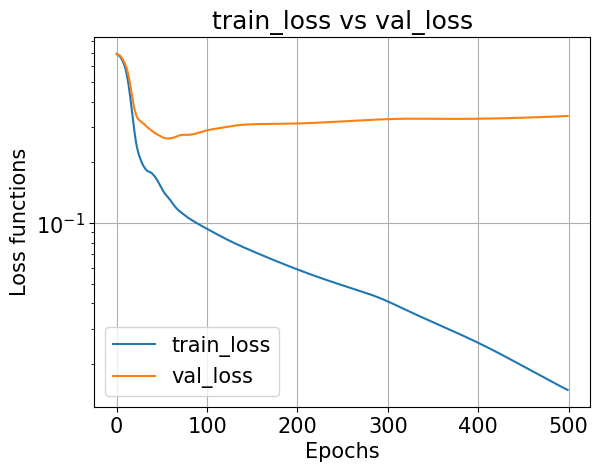

In [95]:
plt.plot(history['train_loss'],label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

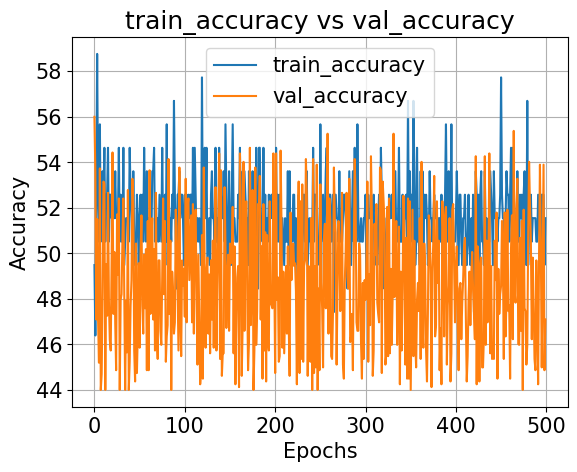

In [13]:
plt.plot(history['train_accuracy'],label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

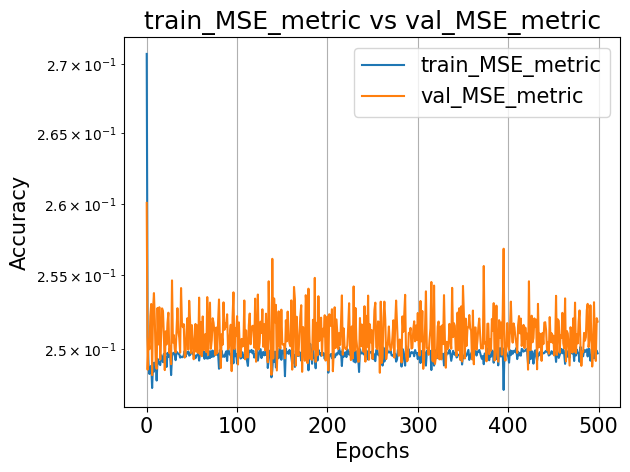

In [14]:
plt.plot(history['train_MSE'],label='train_MSE_metric')
plt.plot(history['val_MSE'], label='val_MSE_metric')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_MSE_metric vs val_MSE_metric', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(accuracy(y_pred, y_test.reshape(y_pred.shape)))

47.22222222222222


In [17]:
a = np.array([1,2,3]).reshape((1,3))
print(a.shape)

(1, 3)


In [18]:
np.mean(a,axis=0)

array([1., 2., 3.])

In [19]:
def prova(a):
    try:
        b = np.log(a)
        return b
    except RuntimeWarning: print('Impossibile')

In [20]:
prova(1-0.9999999999999999999999999999)

C:\Users\HP\AppData\Local\Temp\ipykernel_13276\4184142105.py:3: RuntimeWarning: divide by zero encountered in log
  b = np.log(a)


-inf

In [21]:
for k in range(0, 124, 32):
    print(min(k + 32, 124))

32
64
96
124


In [22]:
def aaa(r):
    r.pop('a')
    r.pop('b')
    return {'aaa':2}

dict = {'a':1, 'b':2,'c':3}
print(dict)
dict_copy = dict.copy()
print(dict_copy)
print(aaa(dict))
print(dict)
print(dict_copy)


{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 3}
{'aaa': 2}
{'c': 3}
{'a': 1, 'b': 2, 'c': 3}
